Imports

In [46]:
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import numpy as np
seaborn.set_theme()
%matplotlib inline

Load in csv dataframe

In [51]:
df = pd.read_csv("c:\\Users\\andy1\\Box\\Glenn Code\\Senior-Design-Shenanigans\\Fog16 feature extraction data.csv")

boxFolder = "c:\\Users\\andy1\\Box\\"

matFilePath = boxFolder + "Glenn Code\\Senior-Design-Shenanigans\\Andy H\\"
matFileName = "fog16 time-interpolated data with LWC.mat"

matFile = scipy.io.loadmat(matFilePath + matFileName, squeeze_me=True)

df['LWC_gm-3'] = np.array(matFile['doubles'])[:, 3]

df.iloc[1:5]

,Unnamed: 0,timeSinceStart,MOR_meters,MeanVD_microns,ImageIndex,Vis_LapVar,Vis_LapMax,Vis_FFTVar,Vis_FFTMax,Inf_LapVar,Inf_LapMax,Inf_FFTVar,Inf_FFTMax,LWC_gm-3
1,1,3.805,70.167191,0.238341,6,0.000101,1.600000,560.645879,378.325395,0.001059,0.735561,623.150277,447.288436,0.110115
2,2,4.562,67.759429,0.235992,7,0.000103,1.639216,559.371565,378.052536,0.001044,0.729839,627.760392,444.848020,0.117063
3,3,5.329,61.405357,0.237520,8,0.000105,1.647059,558.474030,378.324190,0.001070,0.752422,617.733081,444.018564,0.120081
4,4,6.089,49.194987,0.239208,9,0.000112,1.572549,553.989072,378.095525,0.001084,0.758587,617.730051,444.776075,0.124383


Eliminate columns not needed for visualization

In [52]:
df = df.drop(columns=['Unnamed: 0','ImageIndex'])
df.iloc[1:5]

,timeSinceStart,MOR_meters,MeanVD_microns,Vis_LapVar,Vis_LapMax,Vis_FFTVar,Vis_FFTMax,Inf_LapVar,Inf_LapMax,Inf_FFTVar,Inf_FFTMax,LWC_gm-3
1,3.805,70.167191,0.238341,0.000101,1.600000,560.645879,378.325395,0.001059,0.735561,623.150277,447.288436,0.110115
2,4.562,67.759429,0.235992,0.000103,1.639216,559.371565,378.052536,0.001044,0.729839,627.760392,444.848020,0.117063
3,5.329,61.405357,0.237520,0.000105,1.647059,558.474030,378.324190,0.001070,0.752422,617.733081,444.018564,0.120081
4,6.089,49.194987,0.239208,0.000112,1.572549,553.989072,378.095525,0.001084,0.758587,617.730051,444.776075,0.124383


Get separate DataFrames for visible and infrared

In [53]:
df_visible = df[["MOR_meters", "MeanVD_microns", "LWC_gm-3", "Vis_LapVar", "Vis_LapMax", "Vis_FFTVar", "Vis_FFTMax"]]
df_infrared = df[["MOR_meters", "MeanVD_microns", "LWC_gm-3", "Inf_LapVar", "Inf_LapMax", "Inf_FFTVar", "Inf_FFTMax"]]


Use seaborn for visualization

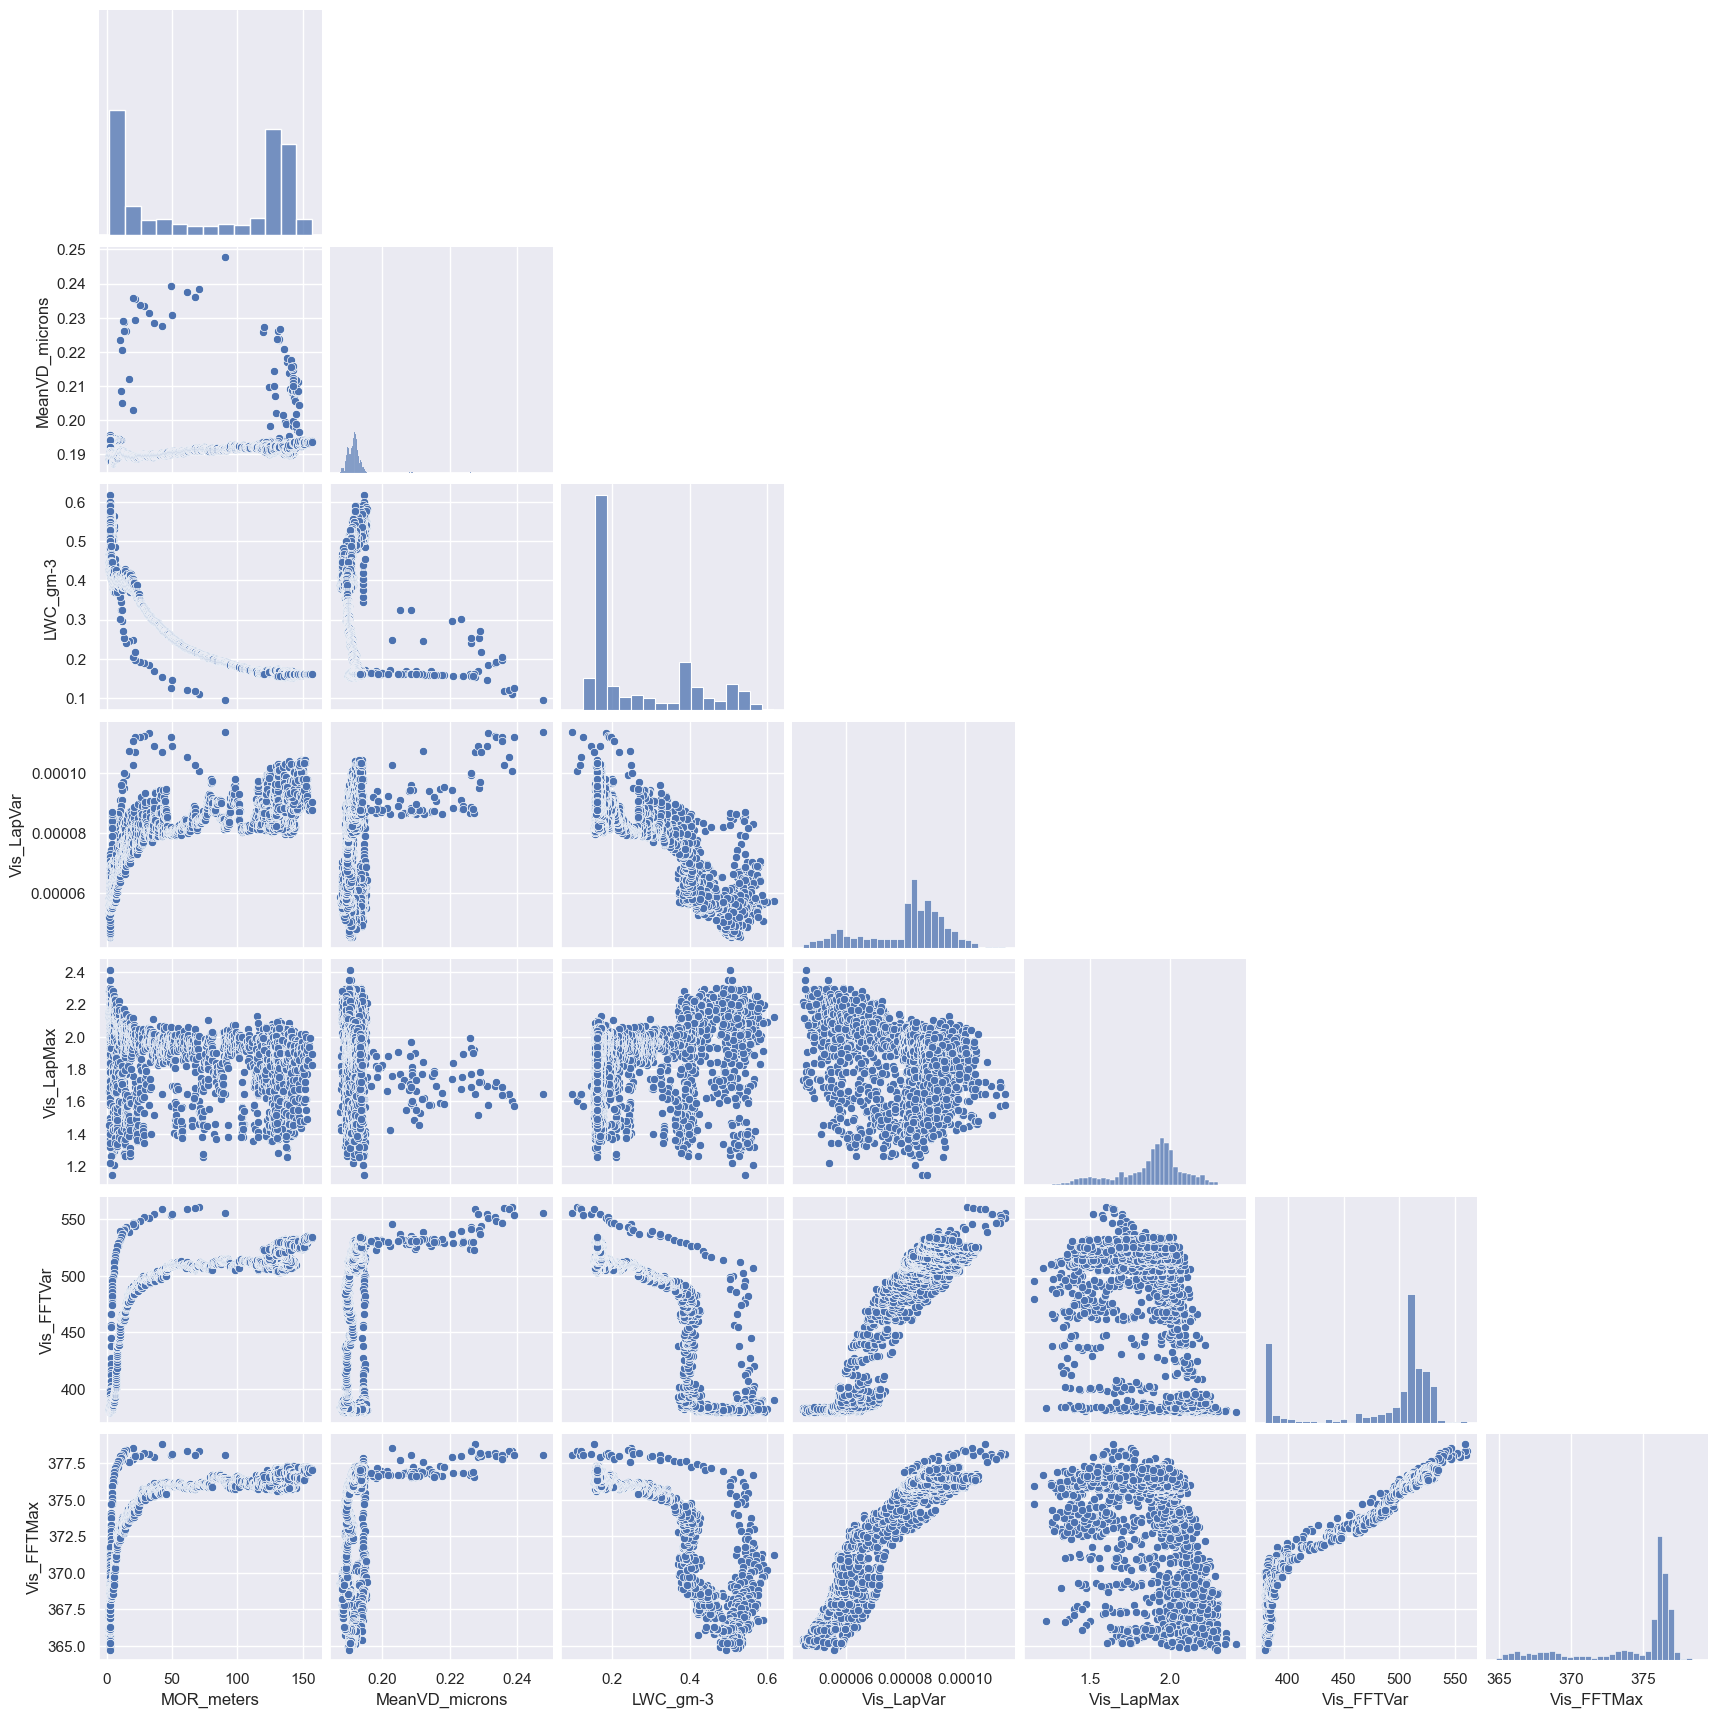

In [54]:
seaborn.pairplot(df_visible, corner=True)

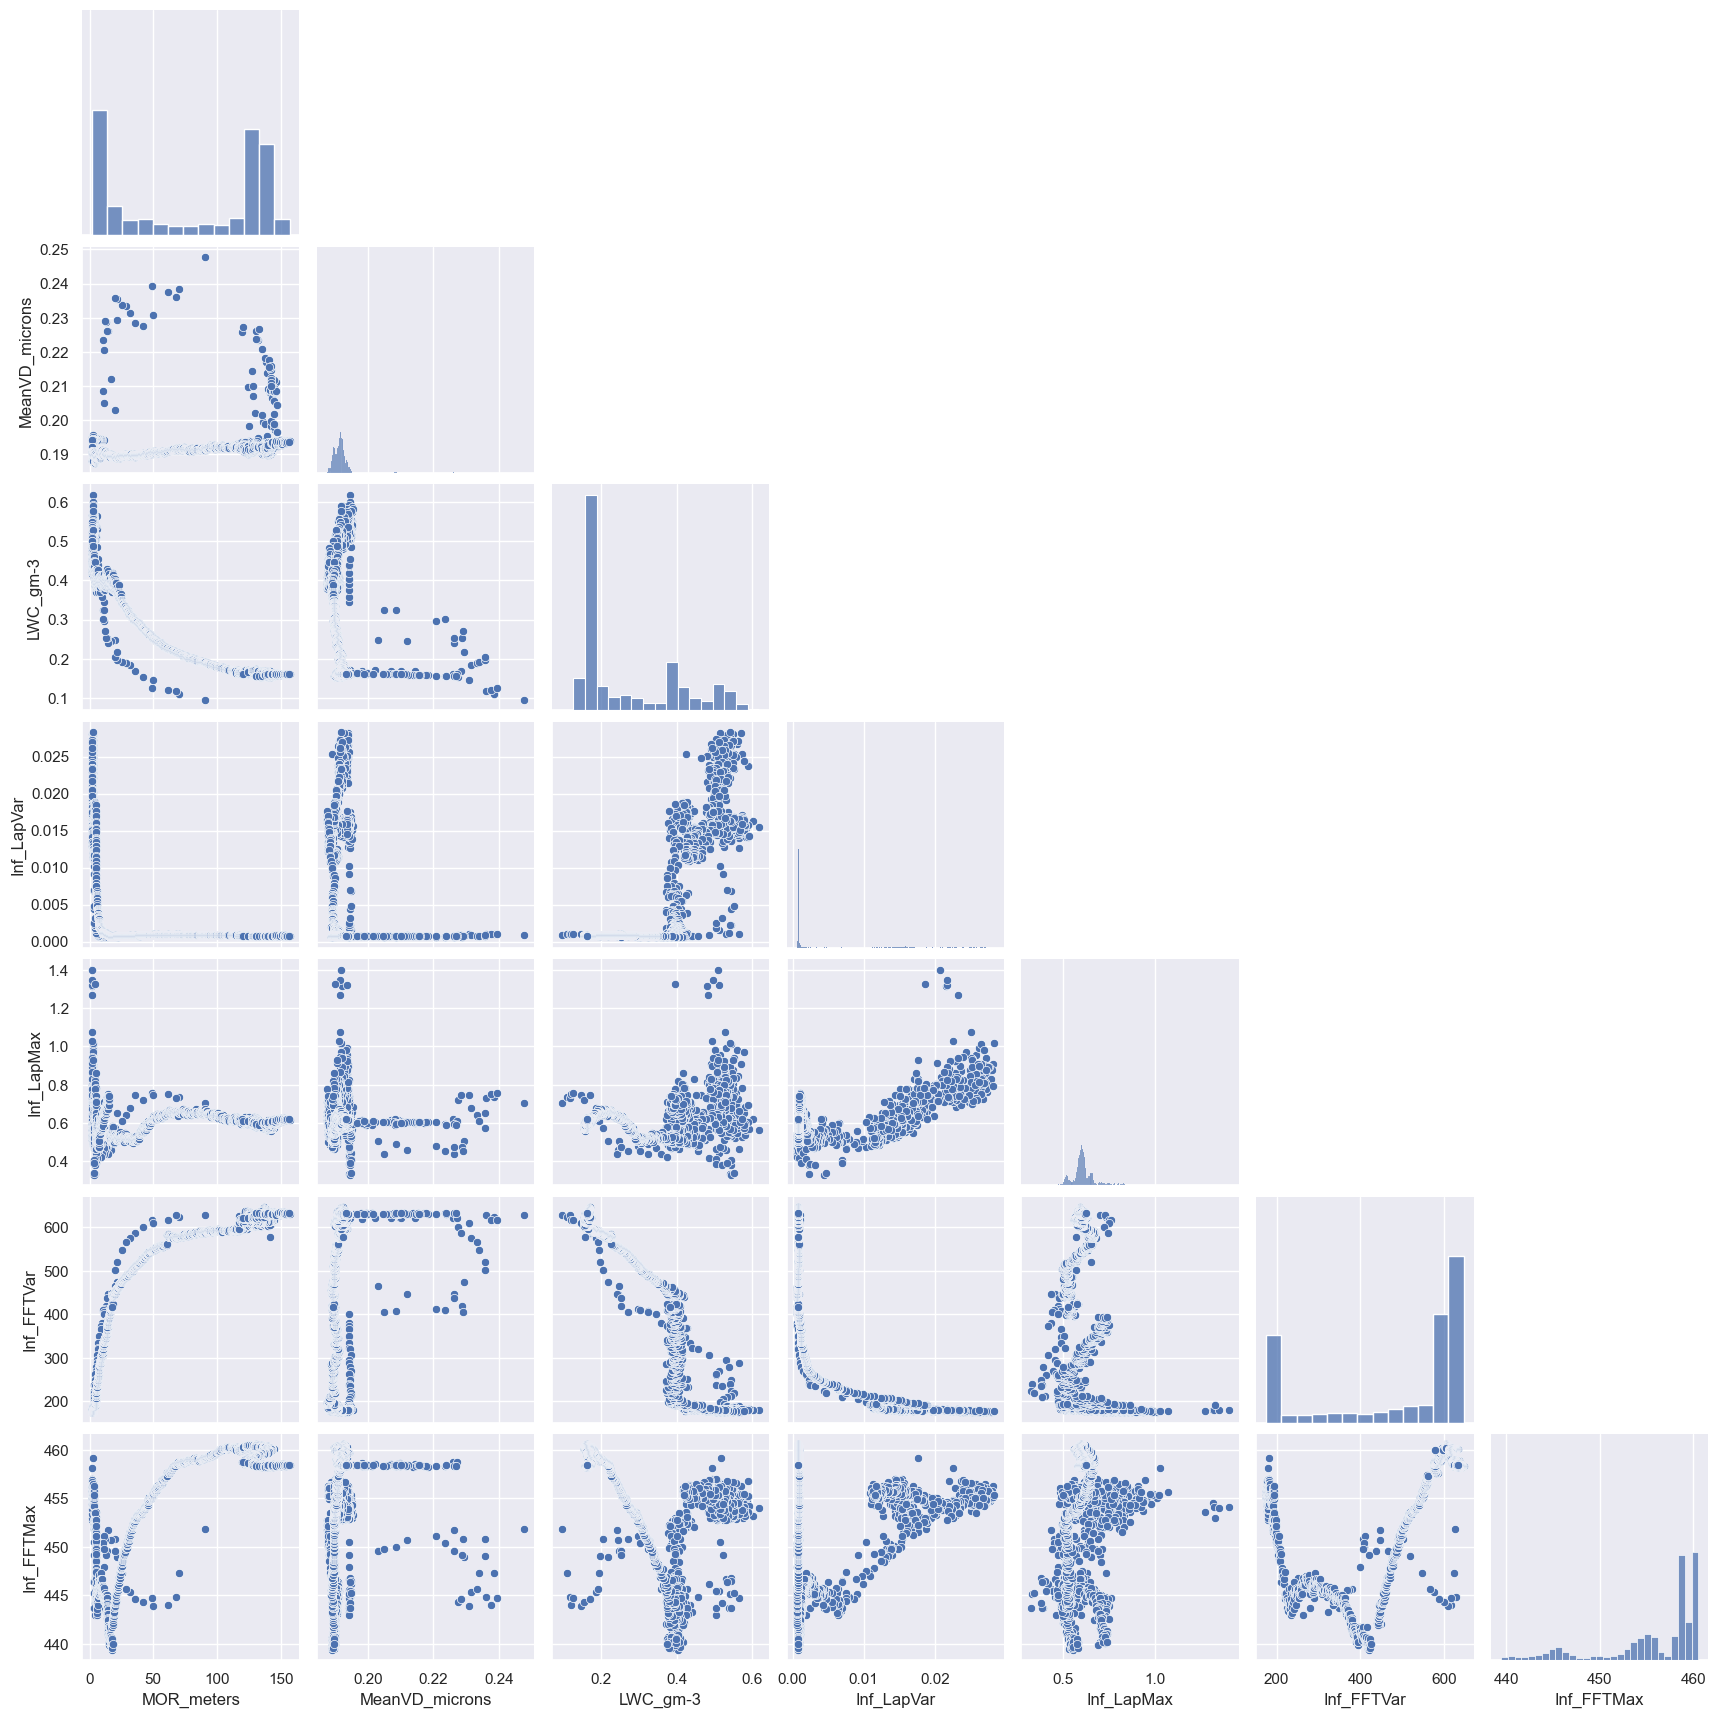

In [55]:
seaborn.pairplot(df_infrared, corner=True)

Text(0.5, 1.0, 'Fog16 experiment')

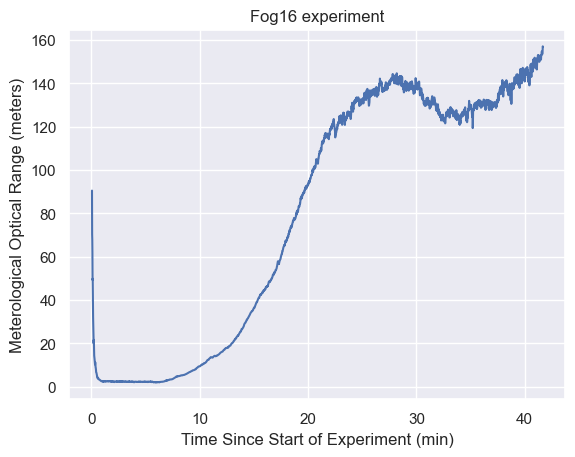

In [35]:
plt.plot(df["timeSinceStart"]/60, df["MOR_meters"])
plt.xlabel("Time Since Start of Experiment (min)")
plt.ylabel("Meterological Optical Range (meters)")
plt.title("Fog16 experiment")

Text(0.5, 1.0, 'Fog16 experiment')

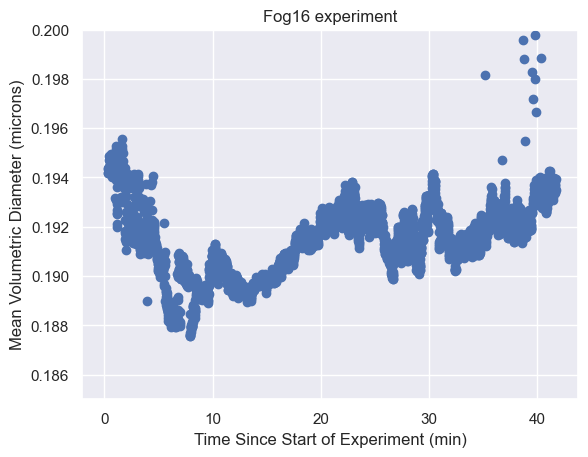

In [58]:
plt.scatter(df["timeSinceStart"]/60, df["MeanVD_microns"])
plt.xlabel("Time Since Start of Experiment (min)")
plt.ylabel("Mean Volumetric Diameter (microns)")
plt.ylim([0.185, 0.2])
plt.title("Fog16 experiment")

Text(0.5, 1.0, 'Fog16 experiment')

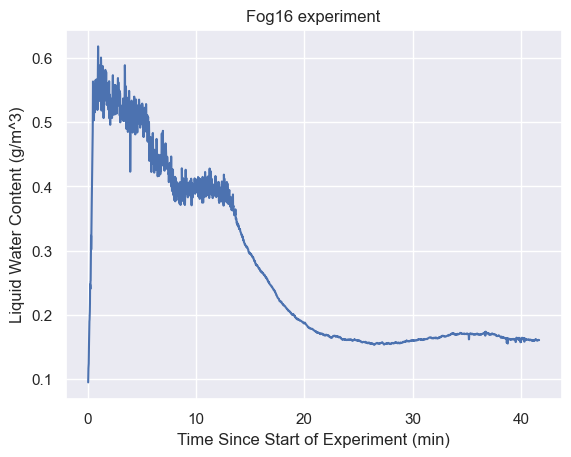

In [57]:
plt.plot(df["timeSinceStart"]/60, df["LWC_gm-3"])
plt.xlabel("Time Since Start of Experiment (min)")
plt.ylabel("Liquid Water Content (g/m^3)")
plt.title("Fog16 experiment")

Text(0.5, 1.0, 'Fog16 experiment')

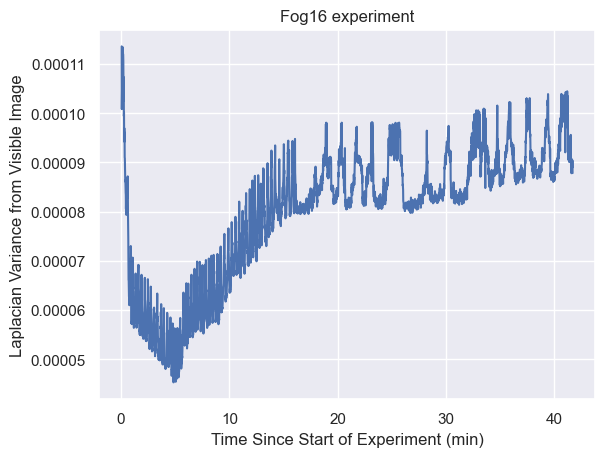

In [62]:
plt.plot(df["timeSinceStart"]/60, df["Vis_LapVar"])
plt.xlabel("Time Since Start of Experiment (min)")
plt.ylabel("Laplacian Variance from Visible Image")
plt.title("Fog16 experiment")